In [83]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [84]:
deliveries = pd.read_csv(r"C:\Users\Sushil Kendre\OneDrive\Desktop\Sushil\Deliveries.csv")

In [85]:
deliveries.sample(5)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
109251,829707,2,Delhi Daredevils,Chennai Super Kings,7,1,JA Morkel,R Ashwin,KM Jadhav,1,0,1,NaN,0,NaN,NaN,NaN
98436,729311,1,Sunrisers Hyderabad,Chennai Super Kings,18,7,KV Sharma,BW Hilfenhaus,DJG Sammy,2,0,2,NaN,0,NaN,NaN,NaN
238446,1359526,2,Sunrisers Hyderabad,Rajasthan Royals,7,6,Abhishek Sharma,YS Chahal,RA Tripathi,4,0,4,NaN,0,NaN,NaN,NaN
117137,829777,1,Rajasthan Royals,Delhi Daredevils,12,1,KK Nair,AD Mathews,AM Rahane,1,0,1,NaN,0,NaN,NaN,NaN
41529,419165,2,Mumbai Indians,Chennai Super Kings,9,6,AM Nayar,SB Jakati,SR Tendulkar,0,1,1,legbyes,0,NaN,NaN,NaN


In [86]:
deliveries.fillna('Unknown', inplace=True)

## Find the total runs scored by each team
##### Group by batting_team and sum the total_runs column.

In [88]:
total_runs_scored = deliveries.groupby(by=['batting_team']).sum()[['total_runs']]

In [89]:
top_10 = total_runs_scored.sort_values('total_runs', ascending= False)[:10]

In [90]:
import seaborn as sns

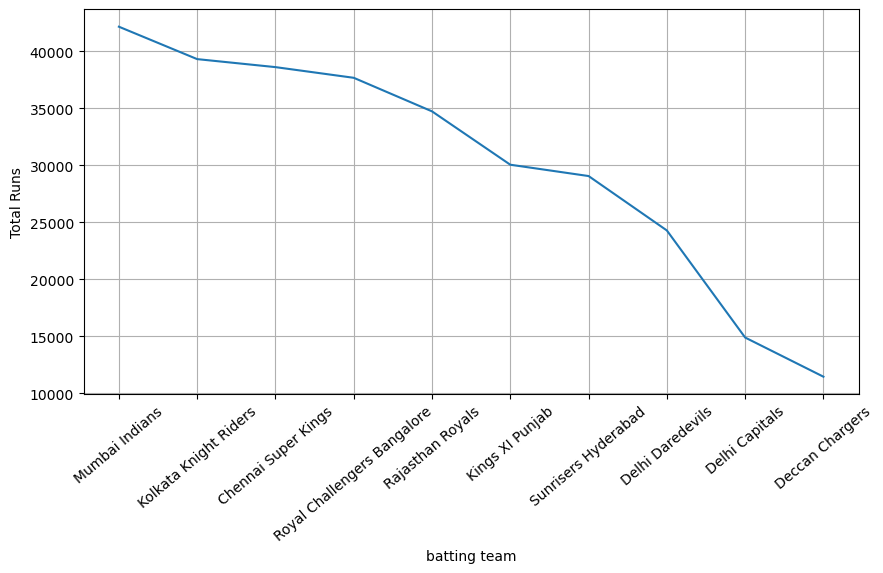

In [91]:
plt.figure(figsize=(10, 5))
plt.grid(True)
plt.plot(top_10)
plt.xticks(rotation= 40)
plt.xlabel('batting team')
plt.ylabel('Total Runs')
plt.show()

## Identify the top 10 highest-scoring batters
##### Group by batter and sum the batsman_runs, then sort in descending order.

In [93]:
total_runs_batsman = deliveries.groupby(by=['batter']).sum()[['batsman_runs']]

In [94]:
top_10_batsman = total_runs_batsman.sort_values(['batsman_runs'], ascending= False)[:10]

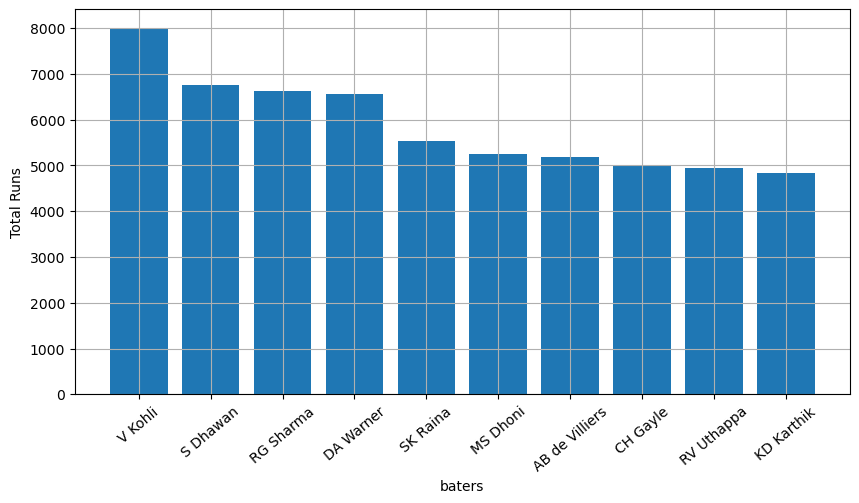

In [95]:
plt.figure(figsize=(10, 5))
plt.grid(True)
plt.bar(top_10_batsman.index, top_10_batsman['batsman_runs'])

plt.xticks(rotation= 40)
plt.xlabel('baters')
plt.ylabel('Total Runs')
plt.show()

## Find the bowler with the most wickets
##### Count dismissals for each bowler where is_wicket == 1 and sort in descending order.

In [97]:
dismissals = deliveries[deliveries['is_wicket']==1].groupby(by=['bowler']).sum()[['is_wicket']]

In [98]:
top_10_bowlers = dismissals.sort_values(['is_wicket'], ascending=False)[:10]

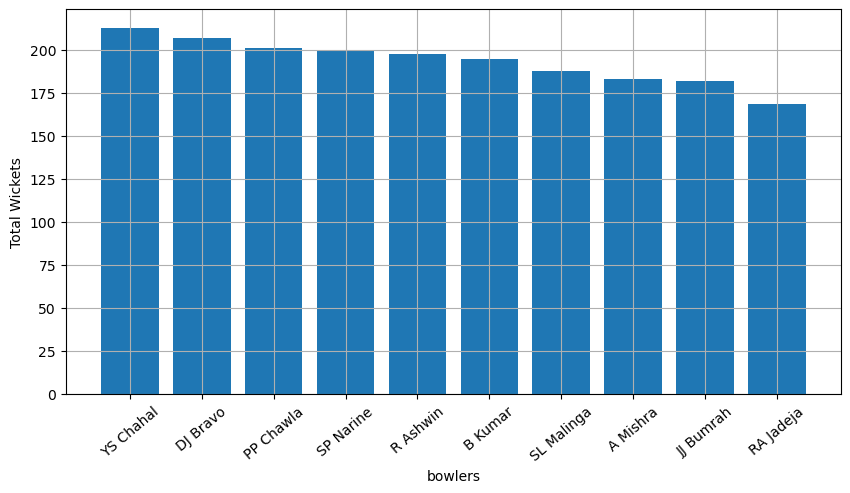

In [99]:
plt.figure(figsize=(10, 5))
plt.grid(True)
plt.bar(top_10_bowlers.index, top_10_bowlers['is_wicket'])

plt.xticks(rotation= 40)
plt.xlabel('bowlers')
plt.ylabel('Total Wickets')
plt.show()

## Calculate the total number of extras conceded by each team
##### Group by bowling_team and sum the extra_runs.

In [ ]:
bowling_team = deliveries.groupby(by=['bowling_team']).sum()[['extra_runs']]

In [ ]:
top_10_bowling_teams = bowling_team.sort_values(['extra_runs'], ascending=False)[:10]

In [ ]:
plt.figure(figsize=(10, 5))
plt.grid(True)
plt.bar(top_10_bowling_teams.index, top_10_bowling_teams['extra_runs'])
plt.xticks(rotation= 40)
plt.xlabel('bowling teams')
plt.ylabel('Extra Runs')
plt.show()

## Find the most common dismissal type
##### Count the occurrences of each unique value in the dismissal_kind column.

In [ ]:
comm_dismissal_kind = deliveries['dismissal_kind'].value_counts()[1:]

In [ ]:
plt.figure(figsize=(10, 5))
plt.grid(True)
# plt.bar(comm_dismissal_kind)
plt.plot(comm_dismissal_kind)
plt.xticks(rotation= 40)
plt.xlabel('Most common dismissal Type')
plt.ylabel('Occurance')
plt.show()

# comm_dismissal_kind

## Determine which over has the highest run rate.
##### Group by over, sum total_runs, and calculate the average.

In [ ]:
over_run_rate = deliveries.groupby(by=['over'])['total_runs'].mean()

In [ ]:
top_10_over = over_run_rate.sort_index( ascending= False)

In [ ]:
plt.figure(figsize=(10, 5))
plt.grid(True)
# plt.bar(top_10_over.index, top_10_over['total_runs'])
plt.plot(top_10_over)
plt.xlim(20, 0)
plt.xticks(rotation= 40)
plt.xlabel('Overs')
plt.ylabel('Average run rate')
plt.show()

In [ ]:
top_10_over

## Analyze powerplay performance (first 6 overs)
##### Filter data where over < 6 and sum total_runs for each batting_team

In [ ]:
powerplay = deliveries[deliveries['over']<6].groupby(['batting_team']).sum()[['total_runs']]

In [ ]:
plt.figure(figsize=(15, 10))
plt.grid(True)
plt.bar(powerplay.index, powerplay['total_runs'], align = 'edge')
plt.xticks(rotation= 40)
plt.xlabel('batting teams')
plt.ylabel('Total Runs')
plt.show()

## Find the batsman with the most sixes and fours
##### Count instances where batsman_runs == 6 and batsman_runs == 4 for each batter

In [ ]:
max_six_four = deliveries[(deliveries['batsman_runs']== 4) | (deliveries['batsman_runs']==6)].groupby(['batter']).sum()[['batsman_runs']]

In [ ]:
max_six_four = max_six_four.sort_values('batsman_runs', ascending=False)[:10]

In [ ]:
plt.figure(figsize=(10, 5))
plt.grid(True)
plt.bar(max_six_four.index, max_six_four['batsman_runs'])
plt.xticks(rotation= 40)
plt.xlabel('batting teams')
plt.ylabel('Total Runs')
plt.show()